In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from scripts.run_pytest import run_pytest

# すべて実行
run_pytest()

# 特定テストのみ
run_pytest(["-q", "tests/test_global_phase.py"])


............                                                             [100%]
12 passed in 0.97s
.                                                                        [100%]
1 passed in 0.75s


0

In [5]:
from scripts.df_rank_error import print_df_rank_error_curve, df_rank_error_curve

molecule_type = 5

# # rank を明示せず、自動で full_rank を推定して比率で評価
# print_df_rank_error_curve(rank_fractions=[1.0, 0.75, 0.5, 0.25], molecule_type=2)

# 比率も指定しない場合はデフォルトで [1.0, 0.75, 0.5, 0.25]
# print_df_rank_error_curve(molecule_type)

# # 点数を指定して自動サンプル（1.0→0.1の線形）
# print_df_rank_error_curve(num_points=5, molecule_type=2)

# 生データが欲しい場合
results = df_rank_error_curve(rank_fractions=[1.0, 0.9, 0.85, 0.4], molecule_type=2, tol=None)
results


[{'rank': 1.0,
  'full_rank': 3.0,
  'rank_frac': 0.3333333333333333,
  'abs_err': 0.6396801358668823,
  'rel_err': 0.286905350506253},
 {'rank': 3.0,
  'full_rank': 3.0,
  'rank_frac': 1.0,
  'abs_err': 2.022922624776835e-15,
  'rel_err': 9.073086565711427e-16}]

In [1]:
from trotterlib.ccsd import populate_df_rank_fraction_config
from trotterlib.config import DEFAULT_DF_CCSD_TARGET_ERROR_HA

mol_list = [i for i in range(10,11)] 

# 例: H2〜H4 の fraction を CA/100 基準で計算して config マップに登録
fractions = populate_df_rank_fraction_config(
    mol_list,
    ccsd_target_error_ha=DEFAULT_DF_CCSD_TARGET_ERROR_HA,
)
print(fractions)


converged SCF energy = -5.21406880302828

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 5, nmo = 10
max_cycle = 800
direct = 0
conv_tol = 1e-08
conv_tol_normt = 0.0001
diis_space = 24
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 308 MB)
Init t2, MP2 energy = -5.32078857655425  E_corr(MP2) -0.106719773525977
Init E_corr(CCSD) = -0.10671977352622


<class 'pyscf.cc.ccsd.CCSD'> does not have attributes  converged


cycle = 1  E_corr(CCSD) = -0.138194141325597  dE = -0.0314743678  norm(t1,t2) = 0.0741541
cycle = 2  E_corr(CCSD) = -0.151496071969769  dE = -0.0133019306  norm(t1,t2) = 0.0424648
cycle = 3  E_corr(CCSD) = -0.162789648935985  dE = -0.011293577  norm(t1,t2) = 0.0230905
cycle = 4  E_corr(CCSD) = -0.164316056015179  dE = -0.00152640708  norm(t1,t2) = 0.00723139
cycle = 5  E_corr(CCSD) = -0.163805534246243  dE = 0.000510521769  norm(t1,t2) = 0.0037542
cycle = 6  E_corr(CCSD) = -0.16389304505396  dE = -8.75108077e-05  norm(t1,t2) = 0.00101862
cycle = 7  E_corr(CCSD) = -0.163935851842804  dE = -4.28067888e-05  norm(t1,t2) = 0.000398592
cycle = 8  E_corr(CCSD) = -0.163900176214167  dE = 3.56756286e-05  norm(t1,t2) = 0.000155145
cycle = 9  E_corr(CCSD) = -0.163902320876102  dE = -2.14466193e-06  norm(t1,t2) = 4.63086e-05
cycle = 10  E_corr(CCSD) = -0.163906167125649  dE = -3.84624955e-06  norm(t1,t2) = 1.48154e-05
cycle = 11  E_corr(CCSD) = -0.163905757198085  dE = 4.09927565e-07  norm(t1,t2) 

error exponent :7.86451361877365
error coefficient :4.8581545081015825e-08
r^2 (log-log): 0.9999999984239039


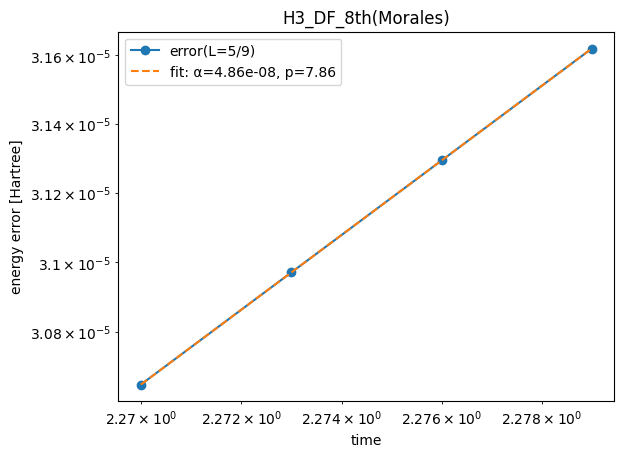

In [4]:
from scripts.df_trotter_energy_plot import df_trotter_energy_error_plot

time_dir = {2:{0:0.73,1:2.21},3:{0:0.75,1:2.27},4:{0:0.37,1:1.12},5:{0:0.36,1:1.08},6:{0:0.25,1:1.25},7:{0:0.23,1:1.19}, 8:{0:0.18, 1:0.94}, 9:{0:0.18, 1:0.90}, 10:{0:0.15, 1:0.75}, 11:{0.14, 0.72}, 12:{0.12, 0.62}, 13:{0.12, 0.60}, 14:{0.10, 0.53}, 15:{0.10, 0.51}} # 初時間セット
t_step = 0.003 # ステップ幅

pf_dir = {0:'2nd', 1:'4th', 2:'8th(Morales)'}

molecule_type = 3
pf_label = pf_dir[2]

if pf_label in ('8th(Morales)', '10th(Morales)'):
    t_start = time_dir[molecule_type][1]
else:
    t_start = time_dir[molecule_type][0]
t_end = t_start + 0.01

save = True
result = df_trotter_energy_error_plot(
    t_start=t_start, t_end=t_end, t_step=t_step,
    molecule_type=molecule_type, pf_label=pf_label,
    estimator="perturbation",
    reference="df",
    save_fit_params=save,
    save_rz_layers=save
)

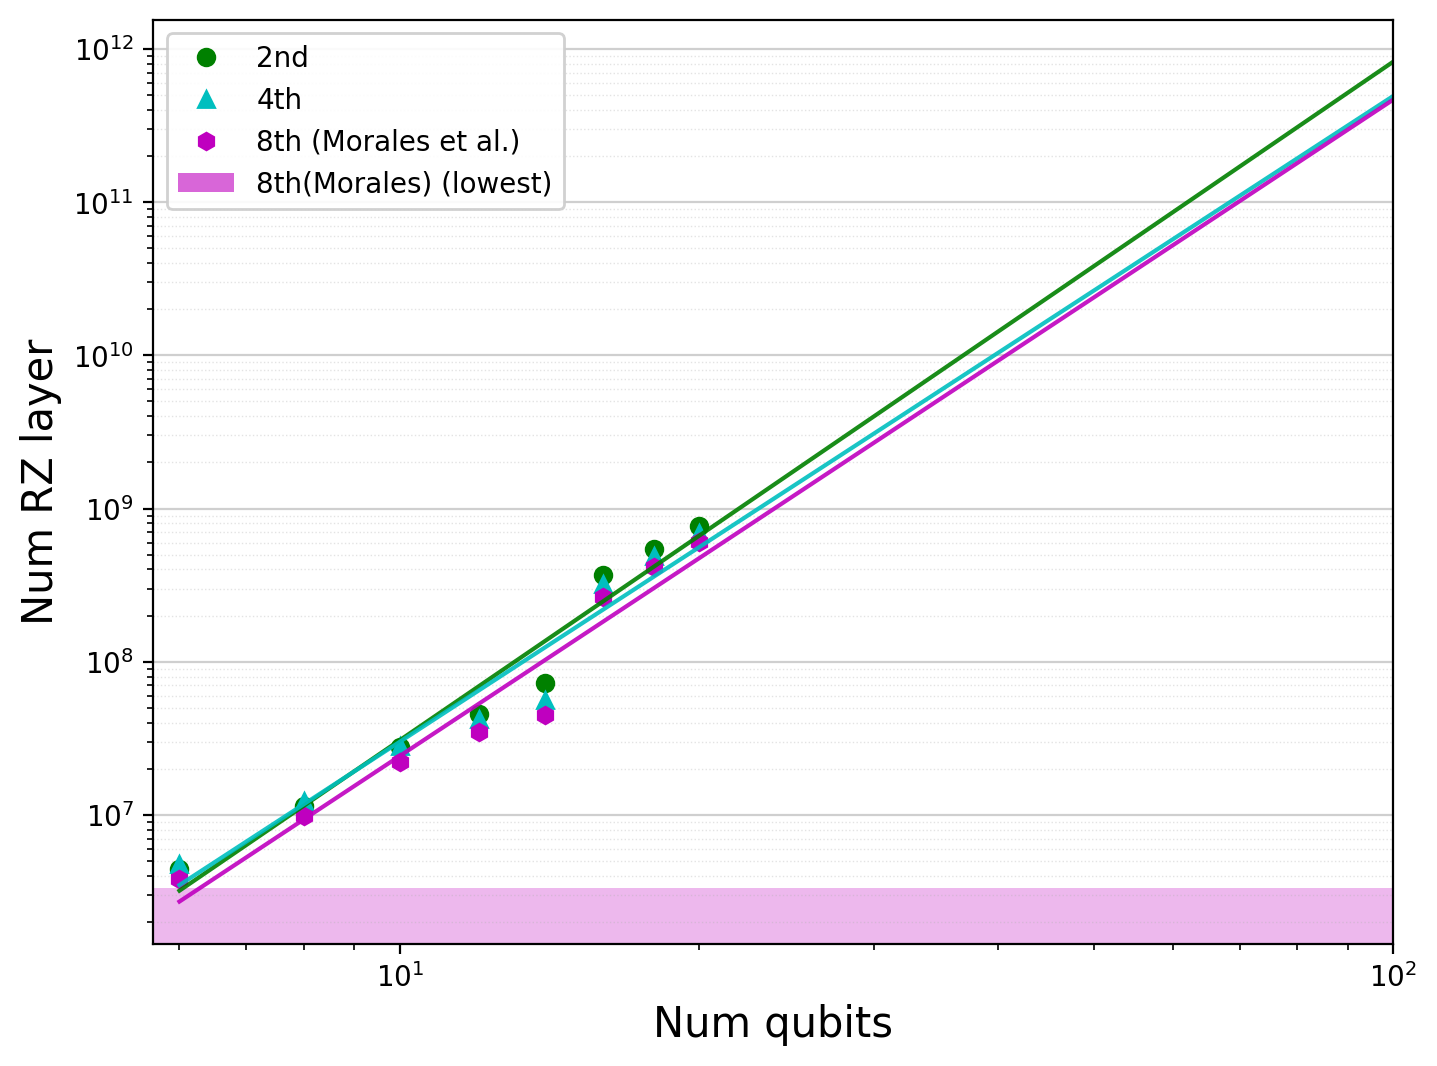

In [1]:
from trotterlib.cost_extrapolation import t_depth_extrapolation_df
t_depth_extrapolation_df(Hchain=10, n_w_list=("2nd","4th",'8th(Morales)'), rz_layer=True)


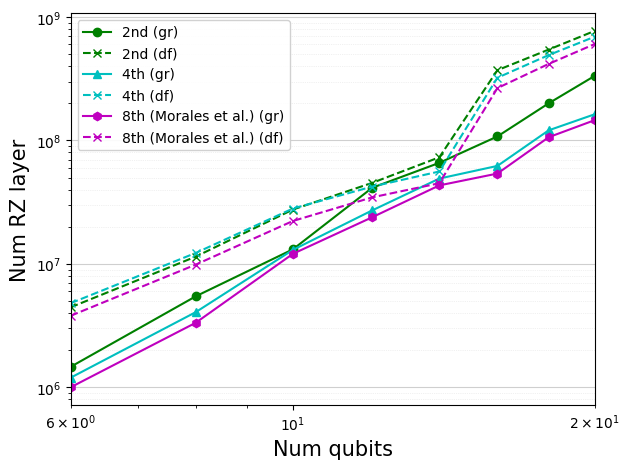

In [1]:
from trotterlib.cost_extrapolation import t_depth_extrapolation_compare_gr_df
t_depth_extrapolation_compare_gr_df(
    Hchain=10,
    n_w_list=("2nd", "4th", "8th(Morales)"),
    rz_layer=True,  # TrueでRZレイヤー比較
)


In [21]:
from openfermion import FermionOperator, QubitOperator
from openfermion.transforms import jordan_wigner
from openfermion.chem.molecular_data import spinorb_from_spatial

from scripts.df_trotter_energy_plot import _h_chain_integrals, _symmetrize_two_body
from trotterlib.df_trotter.decompose import df_decompose_from_integrals

def one_body_fermion_op(mat):
    op = FermionOperator()
    for p in range(mat.shape[0]):
        for q in range(mat.shape[1]):
            c = mat[p, q]
            if abs(c) < 1e-14:
                continue
            op += FermionOperator(((p, 1), (q, 0)), c)
    return op

def are_commuting_singleterm(op1: QubitOperator, op2: QubitOperator) -> bool:
    # 単一項同士の可換性（Pauli文字列の反交換数で判定）
    if len(op1.terms) != 1 or len(op2.terms) != 1:
        raise ValueError("Only single-term QubitOperators are supported.")
    term1 = list(op1.terms.keys())[0]
    term2 = list(op2.terms.keys())[0]
    n_anticommute = 0
    qubits = set(i for i, _ in term1).union(i for i, _ in term2)
    for q in qubits:
        p1 = dict(term1).get(q, "I")
        p2 = dict(term2).get(q, "I")
        if p1 == "I" or p2 == "I":
            continue
        if p1 != p2:
            n_anticommute += 1
    return n_anticommute % 2 == 0

def df_jw_terms_with_comm(
    molecule_type=2, rank_fraction=1, tol=None, threshold=1e-6, topk=30, max_pairs_print=10
):
    constant, one_body, two_body = _h_chain_integrals(molecule_type, distance=None, basis=None)
    two_body = _symmetrize_two_body(two_body)

    n_spatial = one_body.shape[0]
    full_rank = n_spatial**2
    rank = full_rank if rank_fraction >= 1 else max(1, int(round(full_rank * rank_fraction)))
    if rank_fraction >= 1 and tol is None:
        tol = 0.0

    one_body_spin, _ = spinorb_from_spatial(one_body, two_body * 0.5)
    model = df_decompose_from_integrals(one_body, two_body, constant=constant, rank=rank, tol=tol)

    # Hermitian化
    g_list = [0.5 * (g + g.conj().T) for g in model.G_list]
    one_body_corr = 0.5 * (model.one_body_correction + model.one_body_correction.conj().T)

    total = FermionOperator((), constant + model.constant_correction)
    total += one_body_fermion_op(one_body_spin + one_body_corr)
    for lam, g in zip(model.lambdas, g_list):
        total += lam * (one_body_fermion_op(g) * one_body_fermion_op(g))

    jw = jordan_wigner(total)

    items = sorted(jw.terms.items(), key=lambda kv: abs(kv[1]), reverse=True)
    items = [(term, coeff) for term, coeff in items if abs(coeff) >= threshold][:topk]

    # 表示
    for term, coeff in items:
        print(term, coeff)

    # 可換性チェック（上位項のみ）
    ops = [QubitOperator(term, coeff) for term, coeff in items]
    total_pairs = 0
    commute_pairs = 0
    noncomm_examples = []
    for i in range(len(ops)):
        for j in range(i + 1, len(ops)):
            total_pairs += 1
            if are_commuting_singleterm(ops[i], ops[j]):
                commute_pairs += 1
            elif len(noncomm_examples) < max_pairs_print:
                noncomm_examples.append((items[i][0], items[j][0]))
    if total_pairs > 0:
        print(f"commuting pairs: {commute_pairs}/{total_pairs} = {commute_pairs/total_pairs:.3f}")
    if noncomm_examples:
        print("noncommuting examples:")
        for a, b in noncomm_examples:
            print(" ", a, "||", b)

# 例
df_jw_terms_with_comm(molecule_type=2, rank_fraction=1, threshold=1e-6, topk=40)


() (-0.699409846854771+0j)
((0, 'Z'),) (0.29650929673383625+0j)
((1, 'Z'),) (0.2965092967338362+0j)
((2, 'Z'), (3, 'Z')) (0.16326768673564337+0j)
((0, 'Z'), (1, 'Z')) (0.1566006248823795+0j)
((0, 'Z'), (3, 'Z')) (0.1023121683256479+0j)
((1, 'Z'), (2, 'Z')) (0.1023121683256479+0j)
((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')) (0.07575490709850775+0j)
((0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')) (-0.07575490709850775+0j)
((0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')) (-0.07575490709850775+0j)
((0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')) (0.07575490709850775+0j)
((2, 'Z'),) (0.02898064679175027+0j)
((3, 'Z'),) (0.02898064679175024+0j)
((0, 'Z'), (2, 'Z')) (0.02655726122714016+0j)
((1, 'Z'), (3, 'Z')) (0.02655726122714016+0j)
commuting pairs: 89/105 = 0.848
noncommuting examples:
  ((0, 'Z'),) || ((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y'))
  ((0, 'Z'),) || ((0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X'))
  ((0, 'Z'),) || ((0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y'))
  ((0, 'Z'),) || ((0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X'))


df model diagnostics: raw max||G-G†||=2.828e+00 raw max||G||=1.414e+00 raw ||one_body-one_body†||=0.000e+00 raw |lambda|min=4.170e-02 raw |lambda|max=7.053e-01 raw max|Im(lambda)|=0.000e+00 herm max||G-G†||=0.000e+00 herm ||one_body-one_body†||=0.000e+00 herm max|Im(lambda)|=0.000e+00
df reference: constant=2.293101e+00 constant_correction=0.000000e+00 one_body_correction_norm=1.975e+00 num_lambda=16 |lambda|min=4.170e-02 |lambda|max=7.053e-01 energy_ref=-4.203264e+00
df hermitize check: ||H_raw-H_herm||_F=4.596e+00 ||H_raw-H_raw†||_F=3.063e-15 ||H_herm-H_herm†||_F=2.512e-15
df reconstruction check: ||H_herm-H_tensor||_F=1.547e-14 rel=3.976e-16 E0_herm=-4.203264e+00 ΔE0=-8.882e-16
sanity: all checks passed.
rz_count=776
t=2.500e-01 |<0|t>|=1.000000 leak=1.385e-10 phase_err=+1.525e-05 E_phase=-4.203325e+00 dE_phase=-6.100e-05 z=(+6.100e-05+i+7.421e-10) cosEt=0.496863
t=2.530e-01 |<0|t>|=1.000000 leak=1.560e-10 phase_err=+1.618e-05 E_phase=-4.203328e+00 dE_phase=-6.395e-05 z=(+6.395e-05+

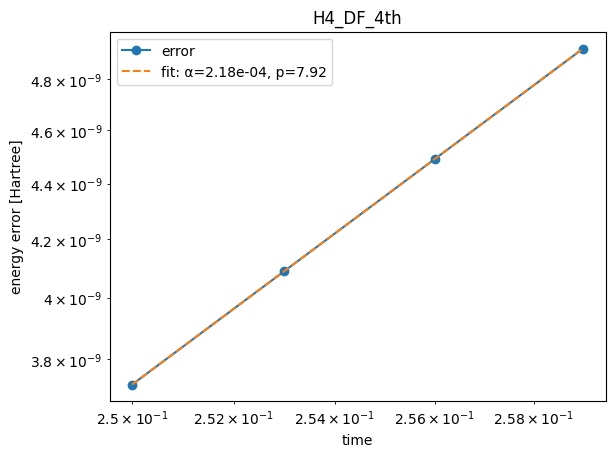

([0.25, 0.253, 0.256, 0.259],
 [3.7214556133451695e-09,
  4.09022583624611e-09,
  4.4904328866879606e-09,
  4.924328199372054e-09])

In [5]:
from scripts.df_trotter_energy_plot import df_trotter_energy_error_plot
df_trotter_energy_error_plot(
    t_start=0.25, t_end=0.26, t_step=0.003,
    molecule_type=4, pf_label="4th",
    rank_fraction=1.0, tol=0.0,
    estimator="perturbation", reference="df",
)


In [16]:
from scripts.df_trotter_energy_plot_perturb import df_phase_match_times

E0, t_list = df_phase_match_times(
    molecule_type=4,
    n_values=[1, 2, 3, 4],
    rank_fraction=0.45,
    use_abs_energy=True,  # True なら E0 の符号に関係なく t>0
)

print("E0 =", E0)
print("t_list =", t_list)


converged SCF energy = -2.09854593699772
E0 = -2.1664244148133314
t_list = [0.3625319942053559, 0.7250639884107118, 1.0875959826160677, 1.4501279768214237]


converged SCF energy = -2.09854593699772
converged SCF energy = -2.09854593699772
error exponent :3.095629393882893
error coefficient :0.003842502904660019
r^2 (log-log): 0.9999886611481091


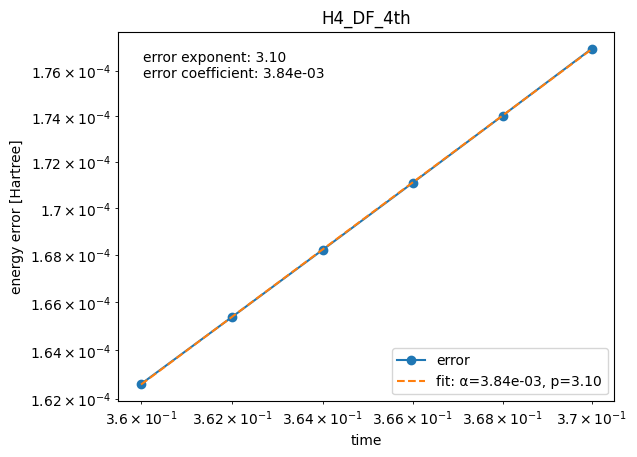

total_rotations (4th, H4): 5.625e+07
pauli rotations (DF circuit): 1436
H4_sto-3g_singlet_distance_100_charge_0
converged SCF energy = -2.09854593699772
sum of all grouped terms == original Hamiltonian?
diffinision0
True
validation of the group:


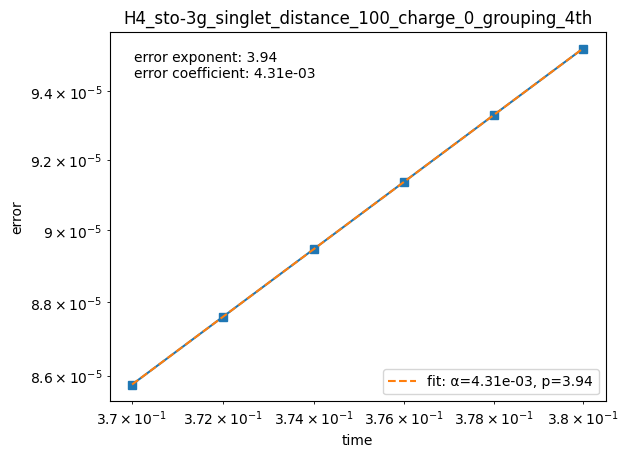

total_rotations (4th, H4) from QC-GR: 3.635e+07
pauli rotations (QC-GR circuit): 1116


(36354487.827579565,
 0.004572324528859247,
 1116,
 [0.37, 0.372, 0.374, 0.376, 0.378, 0.38],
 [array([8.57615385e-05]),
  array([8.76030054e-05]),
  array([8.94735079e-05]),
  array([9.13733346e-05]),
  array([9.33027753e-05]),
  array([9.52621207e-05])],
 LogLogFitResult(slope=3.939578500820287, intercept=-2.3656017103499662, coeff=0.004309216257483895, r2=0.9999999852553434))

In [ ]:
from trotterlib.cost_extrapolation import df_trotter_total_rotations, trotter_qc_gr_total_rotations
df_trotter_total_rotations(
    t_start=0.25, t_end=0.26, t_step=0.002,
    molecule_type=4, pf_label="4th",
    rank_fraction=0.44, reference="exact",
)

trotter_qc_gr_total_rotations(
        t_start=0.25, t_end=0.26, t_step=0.002,
    molecule_type=4, pf_label="4th",
)

In [1]:
from trotterlib.qiskit_time_evolution_pyscf import grouped_jw_list_stats

stats = grouped_jw_list_stats(4)
print(stats)


converged SCF energy = -2.09854593699772
sum of all grouped terms == original Hamiltonian?
diffinision0
True
validation of the group:
original terms: 184
group count: 13
grouped terms (sum): 204
reduction ratio (groups/original terms): 0.071
avg terms per group: 14.15
{'original_terms': 184, 'group_count': 13, 'grouped_terms': 204, 'reduction_ratio': 0.07065217391304347, 'avg_terms_per_group': 14.153846153846153}
